**Step 01:** Import the necessary libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt

**Step 02:** Get the transect besed data from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv ("/content/drive/My Drive/RatesAzimuthWidthModifiedSeaDistSlopeSS_Transects.csv")

**Step 03:** Calculate product of clay and sand percentage

In [4]:
data['Smeans'] = (data['S0'] + data['S10'] + data['S30'] + data['S60'] + data['S100'] + data['S200']) / 6
data['Cmeans'] = (data['C0'] + data['C10'] + data['C30'] + data['C60'] + data['C100'] + data['C200']) / 6
data['Pmeans'] = (data['Cmeans']*data['Smeans'])

**Step 04:**
*   Designate x and y varibales
*   Split both x and y into training and testing datasets
*   Nornalize the dataset

In [6]:
X = data[['Orientation', 'Pmeans', 'Width_Mod', 'Dist_sea', 'Slope', 'Dist_SS']]
y = data['LRR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 05:** Make machine learning models

In [7]:
rf = RandomForestRegressor(random_state = 42)
ad = AdaBoostRegressor(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)
dt = DecisionTreeRegressor(random_state = 42)

**Step 06:** Calculate 10-fold cross-validation for all the models

In [9]:
ts = np.linspace(0.1, 1.0, 10)
rf_sizes, train_rf, val_rf = learning_curve(rf, X_train, y_train, train_sizes = ts, cv = 10, random_state = 42, n_jobs = -1)
ad_sizes, train_ad, val_ad = learning_curve(ad, X_train, y_train, train_sizes = ts, cv = 10, random_state = 42, n_jobs = -1)
gb_sizes, train_gb, val_gb = learning_curve(gb, X_train, y_train, train_sizes = ts, cv = 10, random_state = 42, n_jobs = -1)
dt_sizes, train_dt, val_dt = learning_curve(dt, X_train, y_train, train_sizes = ts, cv = 10, random_state = 42, n_jobs = -1)

**Step 07:** Plot the results

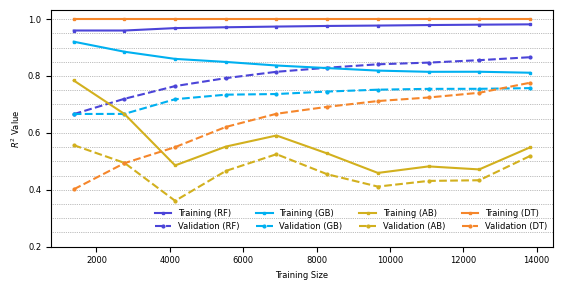

In [10]:
plt.figure(figsize = (6,3))
plt.plot(rf_sizes, train_rf.mean(axis = 1), marker = 's', markersize = 2, color = '#4B44D8', linestyle = '-', label = 'Training (RF)')
plt.plot(rf_sizes, val_rf.mean(axis = 1), marker = 'o', markersize = 2, color = '#4B44D8', linestyle = '--', label = 'Validation (RF)')
plt.plot(gb_sizes, train_gb.mean(axis = 1), marker = 's', markersize = 2, color = '#00B0F0', linestyle = '-', label = 'Training (GB)')
plt.plot(gb_sizes, val_gb.mean(axis = 1), marker = 'o', markersize = 2, color = '#00B0F0', linestyle = '--', label = 'Validation (GB)')
plt.plot(ad_sizes, train_ad.mean(axis = 1), marker = 's', markersize = 2, color = '#D2B01E', linestyle = '-', label = 'Training (AB)')
plt.plot(ad_sizes, val_ad.mean(axis = 1), marker = 'o', markersize = 2, color = '#D2B01E', linestyle = '--', label = 'Validation (AB)')
plt.plot(dt_sizes, train_dt.mean(axis = 1), marker = 's', markersize = 2, color = '#F5862B', linestyle = '-', label = 'Training (DT)')
plt.plot(dt_sizes, val_dt.mean(axis = 1), marker = 'o', markersize = 2, color = '#F5862B', linestyle = '--', label = 'Validation (DT)')

plt.xlabel("Training Size", fontsize = 6)
plt.ylabel("$R^2$ Value", fontsize = 6)
plt.minorticks_on()
plt.grid(axis = 'y', which = 'minor', linestyle = ':', linewidth = '0.5', color = 'gray')
plt.tick_params(axis = 'both', which = 'minor', length = 0)
plt.grid(axis = 'y', which = 'major', linestyle = ':', linewidth = '0.5', color = 'gray')
plt.yticks(np.arange(0.2, 1.1, 0.2))
plt.yticks(fontsize = 6)
plt.xticks(fontsize = 6)
plt.legend(loc = (0.2, 0.051), frameon = False, ncol = 4, fontsize = 6)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/LC_total_Grid.tif', dpi = 600)
plt.show()